# objective : Classify whether new patient can survive or not given x

Data-Set Link : https://www.kaggle.com/gilsousa/habermans-survival-data-set

Data-Set Description : The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:<br>
                        f1 : Age of patient at time of operation (numerical)<br>
                        f2 : Patient's year of operation (year - 1900, numerical)<br>
                        f3 : Number of positive axillary nodes detected (numerical)<br>
                        f4 : Survival status (class attribute)<br>
                            1 = the patient survived 5 years or longer<br>
                            2 = the patient died within 5 year<br>
Missing Attribute Values: None

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/AAIC/Assignments/4.Exploratory Data Analysis on Haberman Dataset/haberman.csv')

col = ['Age of patient at time of operation',
      'Patients year of operation',
      'Number of positive axillary nodes detected',
      'survival_status_after_5_years']

df.columns = col

# High level statistics of the dataset

In [3]:
# Number of Points , number of features, number of classes, data-points per class.
print('Number of Points:',df.shape[0])
print('Number of features:',df.shape[1])
print('Number of classes:',set(df.iloc[:,-1]))
print('Number of data-points per class:\n',df['survival_status_after_5_years'].value_counts())

Number of Points: 305
Number of features: 4
Number of classes: {1, 2}
Number of data-points per class:
 1    224
2     81
Name: survival_status_after_5_years, dtype: int64


OBS:
It seems like data is imbalanced

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Age of patient at time of operation         305 non-null    int64
 1   Patients year of operation                  305 non-null    int64
 2   Number of positive axillary nodes detected  305 non-null    int64
 3   survival_status_after_5_years               305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.describe()

,Age of patient at time of operation,Patients year of operation,Number of positive axillary nodes detected,survival_status_after_5_years
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

In [6]:
df.columns

Index(['Age of patient at time of operation', 'Patients year of operation',
       'Number of positive axillary nodes detected',
       'survival_status_after_5_years'],
      dtype='object')

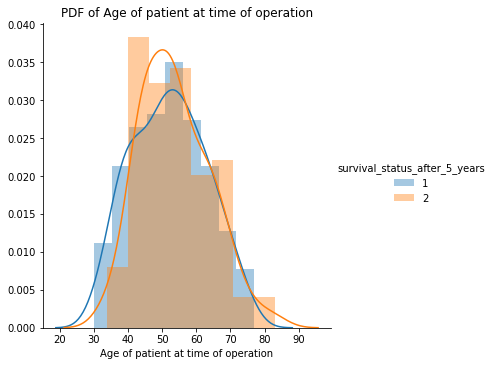

**************************************************


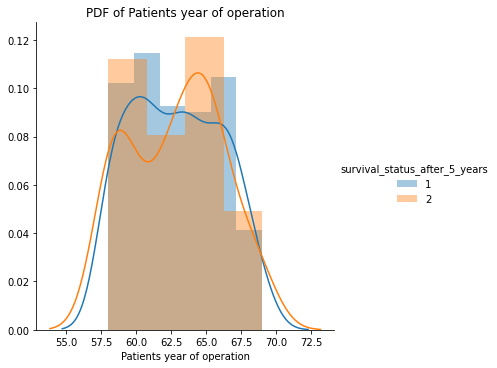

**************************************************


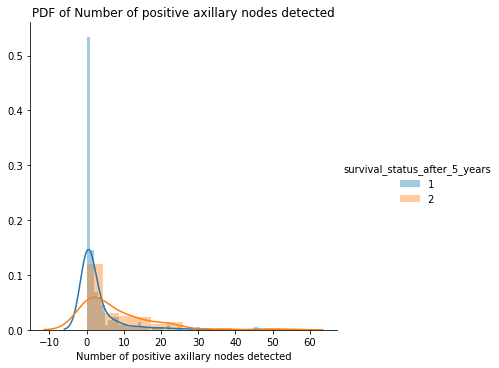

**************************************************


In [7]:
x = ['Age of patient at time of operation',
     'Patients year of operation',
     'Number of positive axillary nodes detected']

for col in x:
    sns.FacetGrid(df, hue="survival_status_after_5_years", height=5) \
       .map(sns.distplot, col) \
       .add_legend();
    plt.title('PDF of {0}'.format(col))
    plt.show();
    print('*'*50)



OBS:
Here all the features are overlapping with the class labels, i.e the pdf plots of each feature w.r.t class labels are found to overlap their distribution, But for the feature " Number of positive axillary nodes detected " , 
after the count ⩰ 5 there is a small gap b/w the distributions.



In [15]:
df.columns

Index(['Age of patient at time of operation', 'Patients year of operation',
       'Number of positive axillary nodes detected',
       'survival_status_after_5_years'],
      dtype='object')

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


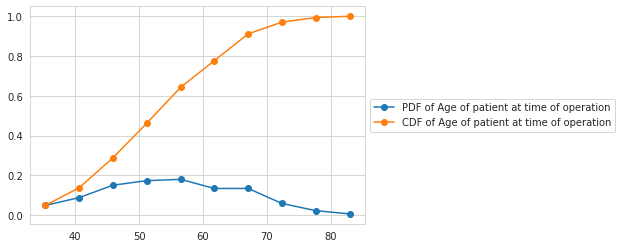

In [55]:
counts, bin_edges = np.histogram(df['Age of patient at time of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-o',label='PDF of Age of patient at time of operation')
plt.plot(bin_edges[1:], cdf,'-o',label='CDF of Age of patient at time of operation')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


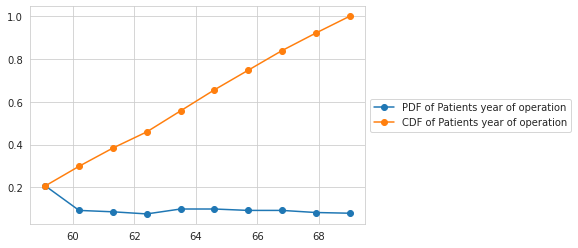

In [56]:
counts, bin_edges = np.histogram(df['Patients year of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-o',label='PDF of Patients year of operation')
plt.plot(bin_edges[1:], cdf,'-o',label='CDF of Patients year of operation')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


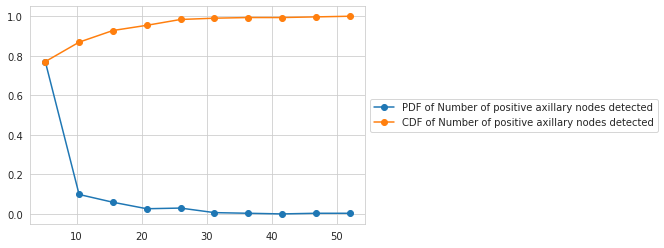

In [57]:
counts, bin_edges = np.histogram(df['Number of positive axillary nodes detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-o',label='PDF of Number of positive axillary nodes detected')
plt.plot(bin_edges[1:], cdf,'-o',label='CDF of Number of positive axillary nodes detected')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

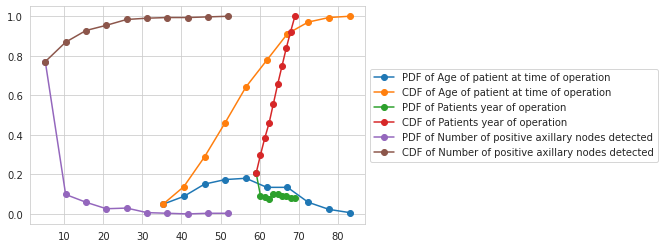

In [58]:
counts, bin_edges = np.histogram(df['Age of patient at time of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-o',label='PDF of Age of patient at time of operation')
plt.plot(bin_edges[1:], cdf,'-o',label='CDF of Age of patient at time of operation')

counts, bin_edges = np.histogram(df['Patients year of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-o',label='PDF of Patients year of operation')
plt.plot(bin_edges[1:], cdf,'-o',label='CDF of Patients year of operation')

counts, bin_edges = np.histogram(df['Number of positive axillary nodes detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-o',label='PDF of Number of positive axillary nodes detected')
plt.plot(bin_edges[1:], cdf,'-o',label='CDF of Number of positive axillary nodes detected')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show();

In [23]:
df.columns

Index(['Age of patient at time of operation', 'Patients year of operation',
       'Number of positive axillary nodes detected',
       'survival_status_after_5_years'],
      dtype='object')

In [41]:
from prettytable import PrettyTable
t = PrettyTable(['Features','Medians', 'Quantiles' , '90th Percentiles' , 'Median Absolute Deviation'])
#print(clf.best_estimator_,'\n',auc_test)
t.add_row(['Age of patient at time of operation',\
          (np.median(df['Age of patient at time of operation'])),\
           (np.percentile(df['Age of patient at time of operation'],np.arange(0, 100, 25))),\
           (np.percentile(df['Age of patient at time of operation'],90)),
           (robust.mad(df['Age of patient at time of operation']))]
          )
t.add_row(['Patients year of operation',\
           (np.median(df['Patients year of operation'])),\
           (np.percentile(df['Patients year of operation'],np.arange(0, 100, 25))),\
           (np.percentile(df['Patients year of operation'],90)),\
           (robust.mad(df['Patients year of operation']))
           ])
t.add_row(['Number of positive axillary nodes detected',\
           (np.median(df['Number of positive axillary nodes detected'])),\
           (np.percentile(df['Number of positive axillary nodes detected'], np.arange(0, 100, 25))),\
           (np.percentile(df['Number of positive axillary nodes detected'], 90)),\
           (robust.mad(df['Number of positive axillary nodes detected']))])
print(t)

+--------------------------------------------+---------+-------------------+------------------+---------------------------+
|                  Features                  | Medians |     Quantiles     | 90th Percentiles | Median Absolute Deviation |
+--------------------------------------------+---------+-------------------+------------------+---------------------------+
|    Age of patient at time of operation     |   52.0  | [30. 44. 52. 61.] |       67.0       |     11.860817748044816    |
|         Patients year of operation         |   63.0  | [58. 60. 63. 66.] |       67.0       |     4.447806655516806     |
| Number of positive axillary nodes detected |   1.0   |   [0. 0. 1. 4.]   |       13.0       |     1.482602218505602     |
+--------------------------------------------+---------+-------------------+------------------+---------------------------+


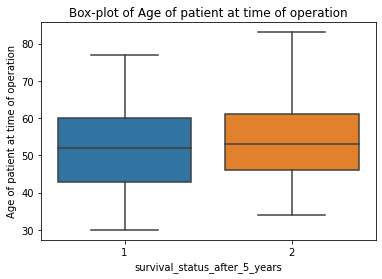

**************************************************


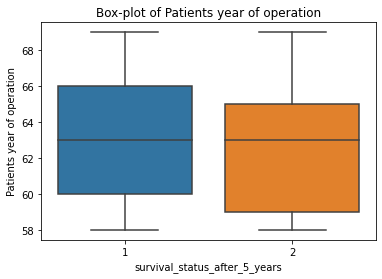

**************************************************


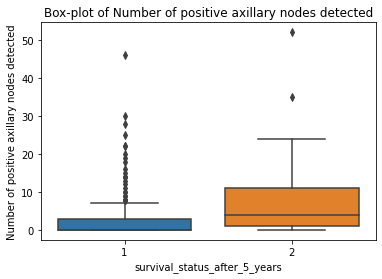

**************************************************


In [8]:
for col in x:
    sns.boxplot(x='survival_status_after_5_years',y = col, data=df)
    plt.title('Box-plot of {0}'.format(col))
    plt.show()
    print('*'*50)


OBS:
we can observe some difference in the box-plot curve for the feature " Number of positive axillary nodes detected ".
I think this feature can be used in classification models

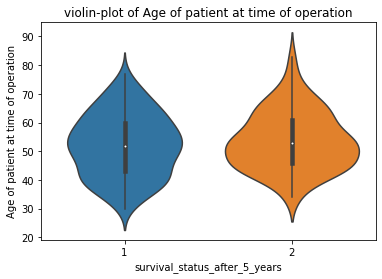

**************************************************


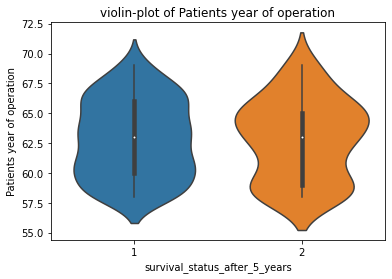

**************************************************


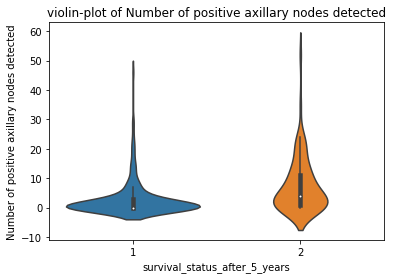

**************************************************


In [9]:
for col in x:
    sns.violinplot(x='survival_status_after_5_years',y = col, data=df)
    plt.title('violin-plot of {0}'.format(col))
    plt.show()
    print('*'*50)

# Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.



In [10]:
df.columns

Index(['Age of patient at time of operation', 'Patients year of operation',
       'Number of positive axillary nodes detected',
       'survival_status_after_5_years'],
      dtype='object')

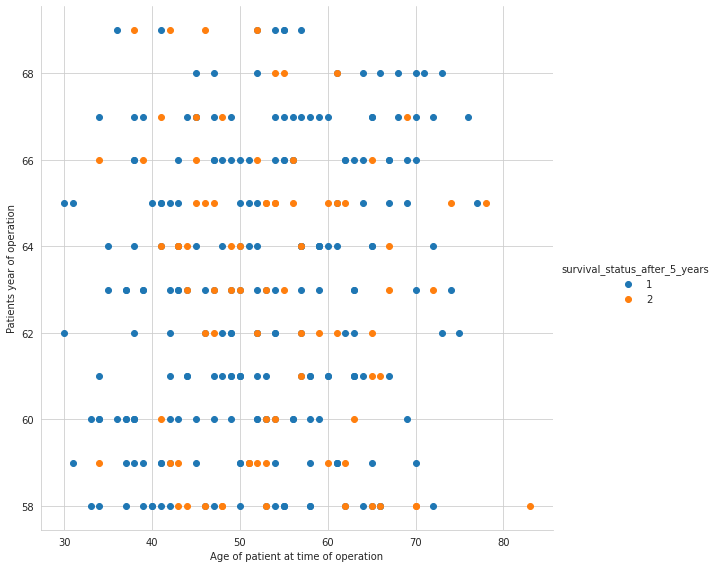

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status_after_5_years", height=8) \
   .map(plt.scatter, 'Age of patient at time of operation', 'Patients year of operation') \
   .add_legend();

plt.show();


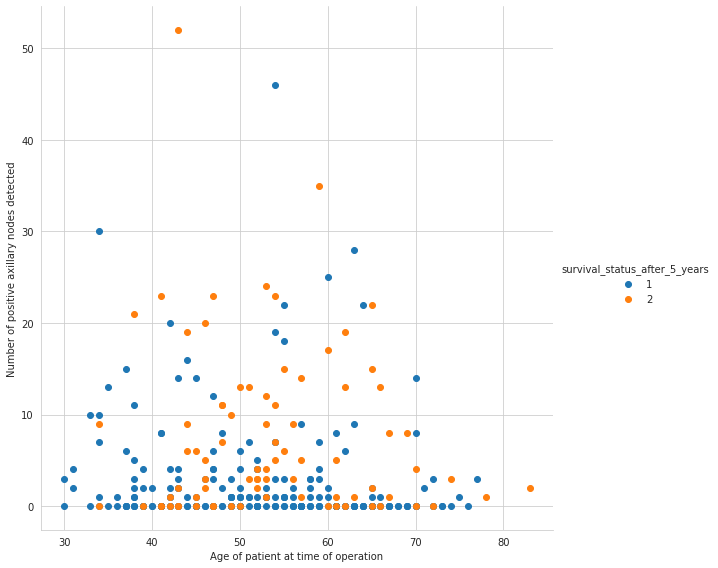

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status_after_5_years", height=8) \
   .map(plt.scatter, 'Age of patient at time of operation', 'Number of positive axillary nodes detected') \
   .add_legend();
plt.show();


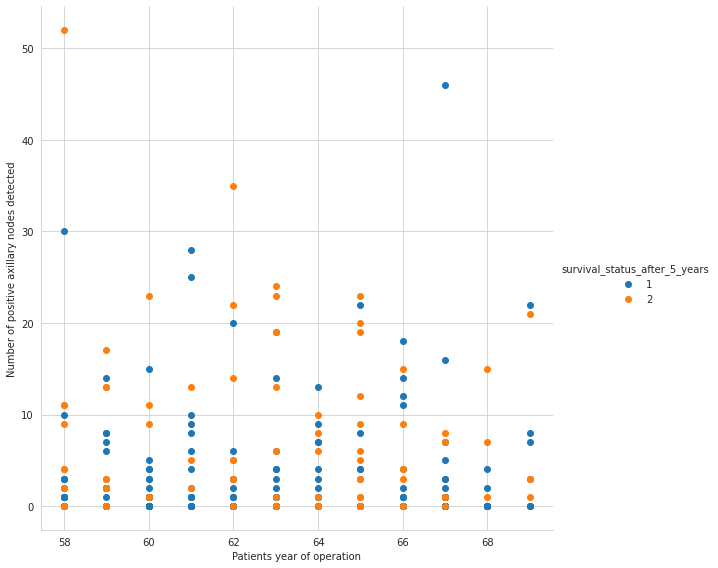

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status_after_5_years", height=8) \
   .map(plt.scatter, 'Patients year of operation','Number of positive axillary nodes detected') \
   .add_legend();
plt.show();


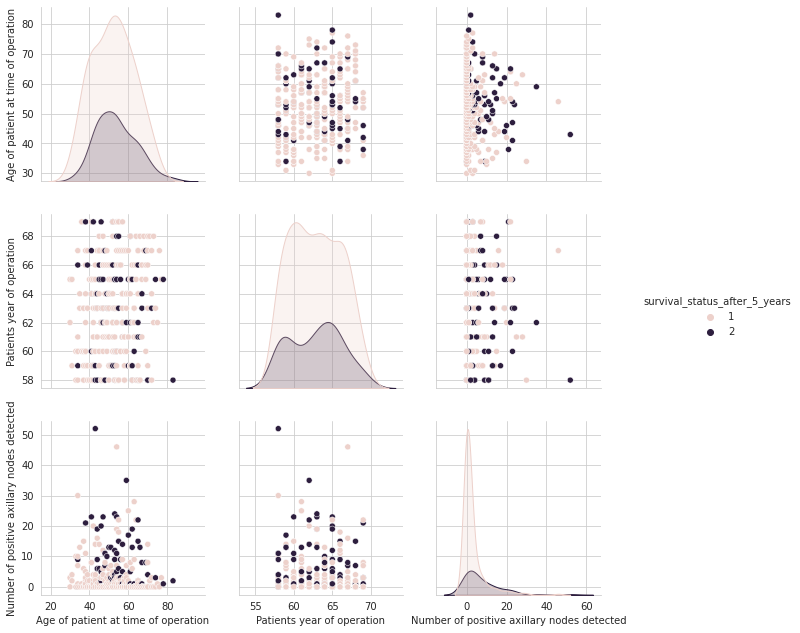

In [14]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="survival_status_after_5_years", height=3);
plt.show()


OBS:
There is an overlap of data points in this scatter-plots.
We cannot find a line/curve which divides this overlap until unless projected into 3-d or n-d.